# 1 - Importar pandas para ler os arquivos CSV e transformar em data frames

In [1]:
# Import pandas para ler o arquivo CSV
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 - Ver tipos de dados e Valores Ausentes

In [2]:
# Ver tipos de dados
display(train_df.info())

# Ver valores ausentes
display(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3 - Tratar Valores Ausentes

In [3]:
# Adicionar a linhas com a coluna "Age" faltando com o valor da mediana
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

# Remover a coluna "Cabin", pois ha mais de 70% das linhas com a coluna ausente
if "Cabin" in train_df.columns:
    train_df.drop(columns="Cabin", inplace=True)

# Preencher "Embarked" com o valor mais comum (moda)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_11160\2412341965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_11160\2412341965.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

# 4 - Transformar Variáveis Categóricas

In [4]:
# Codificando a Coluna "Sex"
train_df["Sex"] = train_df["Sex"].map({'male': 0, 'female':1})

# Codificar "Embarked" em 3 novas colunas
embarked_dummies = pd.get_dummies(train_df["Embarked"], prefix="Embarked")
train_df = pd.concat([train_df, embarked_dummies], axis=1)

train_df.drop(columns="Embarked", inplace=True)


In [5]:
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


# 5 - Separar dados para treinamento e teste do modelo

In [6]:
from sklearn.model_selection import train_test_split

# Variáel a ser prevista
y = train_df["Survived"]

# Entradas (Tirando colunas que não iriam auxiliar o modelo a prever)
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])

# dividindo o dataframe pra treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

# 6 - Treino e Teste do modelo (RandomForestClassifier)

In [15]:
# Import do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Criação e treinamento do modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Teste
y_pred = modelo.predict(X_test)

print("Acuracia:", accuracy_score(y_test, y_pred))
print("Matriz Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acuracia: 0.8100558659217877
Matriz Confusão:
[[88 17]
 [17 57]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 7 - Visualização da importância das fetures no Random Forest

,Feature,Importância
1,Sex,0.279648
5,Fare,0.256427
2,Age,0.251878
0,Pclass,0.091026
3,SibSp,0.047176
4,Parch,0.035335
8,Embarked_S,0.015578
6,Embarked_C,0.013317
7,Embarked_Q,0.009614


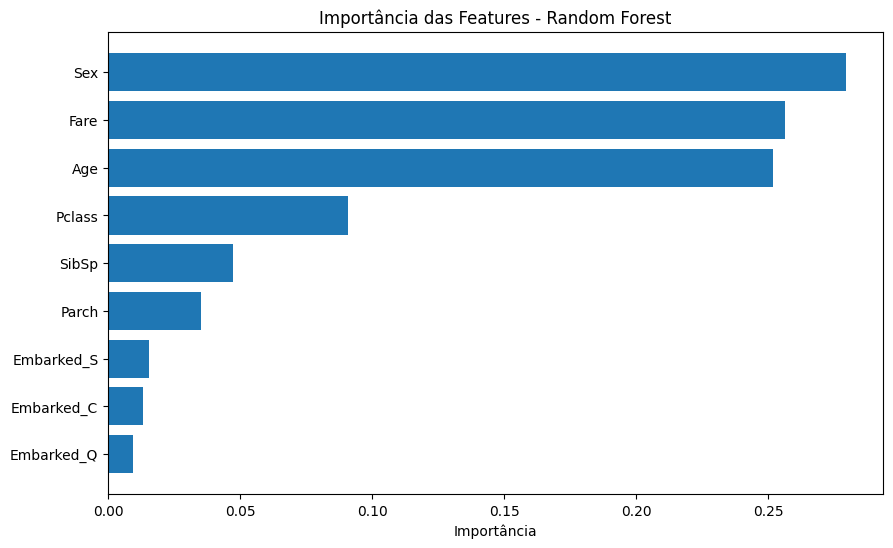

In [14]:
import matplotlib.pyplot as plt

# importancia das features
importancias = modelo.feature_importances_

# nome das colunas usadas no modelo
nomes_colunas = X.columns

# Criação de dataframe para visualização
df_importancia = pd.DataFrame({
    'Feature': nomes_colunas,
    'Importância': importancias,
}).sort_values(by='Importância', ascending=False)

# Exibe como tabela
display(df_importancia)

# Exibe Gráfico
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Feature'], df_importancia['Importância'])
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()  #Coloca as mais importantes no topo
plt.show()

# 8 - Testes com submodelos

* Teste para tabela sem as colunas 'Embarked'

In [13]:
# Remove features de baixa importância
X_reduzido = X.drop(columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

# Divide de novo
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduzido, y, test_size=0.2, random_state=42
)

# Treina novo modelo
modelo_reduzido = RandomForestClassifier(random_state=42)
modelo_reduzido.fit(X_train_r, y_train_r)

# Avalia
y_pred_r = modelo_reduzido.predict(X_test_r)

from sklearn.metrics import accuracy_score, classification_report
print("Acurácia (sem Sex e Embarked):", accuracy_score(y_test_r, y_pred_r))
print(classification_report(y_test_r, y_pred_r))


Acurácia (sem Sex e Embarked): 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Aqui observa-se uma leve queda na acurácia do modelo. Apesar da aparente baixa importância dessas colunas o modelo reagiu mal com as alterações.

* Teste com novas variáveis

In [10]:
from sklearn.preprocessing import LabelEncoder

titanic_novo = train_df.copy()

# Extrai título dos nomes, para verificar se pessoas de classe com algum título foram priorizadas na fuga do navio
titanic_novo['Title'] = titanic_novo['Name'].str.extract(r' ([A-Za-z]+)\. ', expand=False)
titanic_novo['Title'] = titanic_novo['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_novo['Title'] = titanic_novo['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
titanic_novo['Title'] = LabelEncoder().fit_transform(titanic_novo['Title'])

# Novas features
titanic_novo['FamilySize'] = titanic_novo['SibSp'] + titanic_novo['Parch'] + 1
titanic_novo['IsAlone'] = (titanic_novo['FamilySize'] == 1).astype(int)

* Preparação de dados para submodelo

In [11]:
# Define as colunas a usar (inclusive novas)
features_novas = ['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'FamilySize', 'IsAlone']
df_subteste = titanic_novo[features_novas + ['Survived']].copy()

# Codificação de variáveis categóricas
df_subteste = pd.get_dummies(df_subteste, columns=['Sex'], drop_first=True)

# Separação
X_novo = df_subteste.drop('Survived', axis=1)
y_novo = df_subteste['Survived']

* Teste do submodelo

In [12]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_novo, y_novo, test_size=0.2, stratify=y_novo, random_state=42)

modelo_novo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_novo.fit(Xn_train, yn_train)

yn_pred = modelo_novo.predict(Xn_test)
display('Acurácia do subteste com novas variáveis:', accuracy_score(yn_test, yn_pred))

'Acurácia do subteste com novas variáveis:'

0.8212290502793296

# Voltando para o EDA

* Verificando relação entre gênero, classe de ticket e a variável 'Survived'

In [ ]:
fig = plt.figure(figsize=(16,8))
a = 0.65

# Mulheres de classe alta
ax1 = fig.add_subplot(2,2,1)
f_high = train_df[(train_df['Sex'] == 1) & (train_df['Pclass'] != 3)]
f_high['Survived']